# Algoritmo de Grover en Qiskit
Este cuaderno tiene como propósito implementar y resolver el algoritmo de Grover utilizando la librería Qiskit de IBM. A lo largo del cuaderno se explicarán los conceptos fundamentales del algoritmo, se mostrará cómo construir el circuito cuántico correspondiente y se analizarán los resultados obtenidos, aprovechando las herramientas que ofrece Qiskit para la computación cuántica.
El propósito es resolver el problema de búsqueda sin orden, donde se busca un elemento específico partiendo de una serie de condiciones iniciales que codifiquen el oráculo.
## Fuente
La fuente de este cuaderno es tomada de los videos de Ket.G

In [2]:
# Importamos las librerías necesarias
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

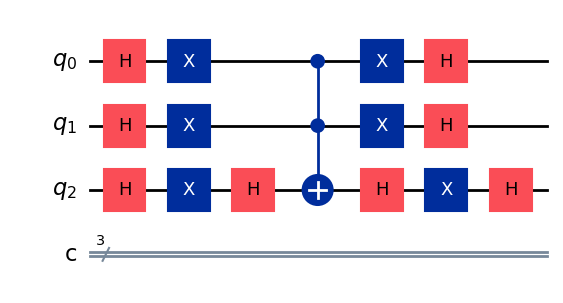

In [3]:
# Implementamos la puerta de Grover

Grover = QuantumCircuit(3,3)

Grover.h(range(3))
Grover.x(range(3))

Grover.h(2)
Grover.mcx([0,1], 2) 
Grover.h(2)           

Grover.x(range(3))
Grover.h(range(3))

Grover.draw(output = "mpl")

Supongamos que tenemos un conjunto de 8 elementos y queremos encontrar un elemento específico. El algoritmo de Grover nos permite hacerlo de manera eficiente en comparación con una búsqueda clásica, que requeriría en promedio revisar la mitad de los elementos.
Definimos propiedades de cada uno de los 8 elementos:
- Característica A: Posición 0
- Característica B: Posición 1
- Característica C: Posición 2

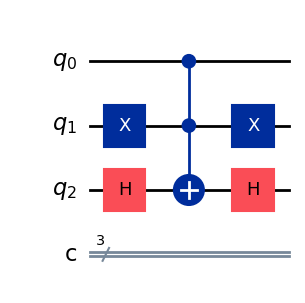

In [4]:
# Esta es la función que podeis cambiar para buscar nuevos elementos

marca_buena = 1
modelo_diesel = 0
ubicacion_central = 1
flagpos = -1


Detector = QuantumCircuit(3,3)

# Paso 1: Convierte los ceros del estado objetivo en unos usando X
if not marca_buena:
    Detector.x(0)  # Qubit 0 debe ser 0, así que lo invertimos
else:
    flagpos = 0
if not modelo_diesel:
    Detector.x(1)  # Qubit 1 debe ser 0, así que lo invertimos
else:
    flagpos = 1
if not ubicacion_central:
    Detector.x(2)  # Qubit 2 debe ser 0, así que lo invertimos
else:
    flagpos = 2

# Paso 2: Aplica la puerta CCZ (control-control-Z) para marcar |101⟩
if flagpos == -1:
    Detector.h(0)                # H para convertir Z en X en el qubit objetivo
    Detector.ccx(1,2,0)          # CCX (Toffoli) con controles en qubits 0 y 1, objetivo en 2
    Detector.h(0)
else:
    controllers = [0,1,2]
    controllers.remove(flagpos)
    Detector.h(flagpos)                # H para convertir Z en X en el qubit objetivo
    Detector.ccx(controllers[0],controllers[1],flagpos)          # CCX (Toffoli) con controles en qubits 0 y 1, objetivo en 2
    Detector.h(flagpos)

# Paso 3: Deshaz la inversión
if not marca_buena:
    Detector.x(0)  # Qubit 0 debe ser 0, así que lo invertimos
if not modelo_diesel:
    Detector.x(1)  # Qubit 1 debe ser 0, así que lo invertimos
if not ubicacion_central:
    Detector.x(2)  # Qubit 2 debe ser 0, así que lo invertimos


Detector.draw(output="mpl")

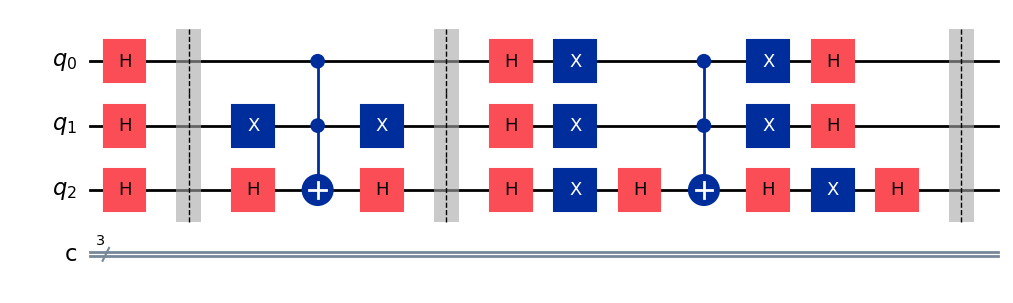

In [6]:
circ = QuantumCircuit(3,3)
circ.h(range(3))
circ.barrier(range(3))
circ.compose(Detector, inplace=True)
circ.barrier(range(3))
circ.compose(Grover, inplace=True)
circ.barrier(range(3))
#circ.measure(range(3), range(3))
circ.draw(output = "mpl")

Note: you may need to restart the kernel to use updated packages.


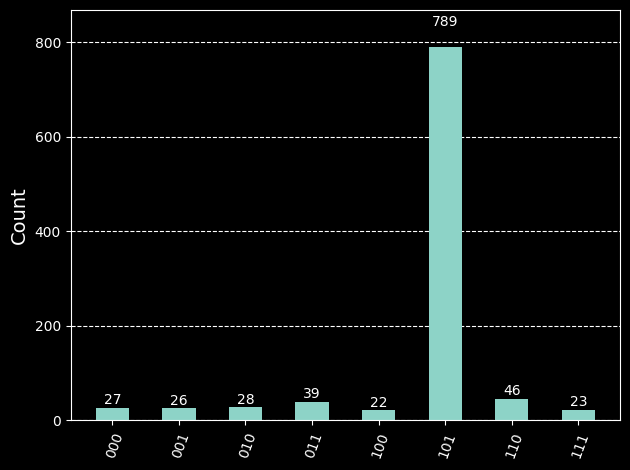

In [8]:
%pip install qiskit-aer

from qiskit import transpile
from qiskit_aer import AerSimulator

circ.measure(range(3), range(3))

simulator = AerSimulator()
circ_t = transpile(circ, simulator)
job = simulator.run(circ_t, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [22]:
input()

'2'